## Keras/Tensorflow Modelling Tutorial: MNIST Dataset

This tutorial will demonstrate the general steps and setup for using Keras for deep learning. We will use the MNIST dataset for this demonstration. We will also go through the following:

* Setting up environment with Keras with Tensorflow as the backend
* Creation of training and testing sets from dataset
* Building a convolutional neural network (CNN) model
* Accuracy after training and testing the model
* Depiction of error images

This code is adapted from "How to Develop a CNN for MNIST Handwritten Digit Classification" from Machine Learning Mastery and "Keras Tutorial: The Ultimate Beginner's Guide to Deep Learning in Python" from Elite Data Science. The links are included below:
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

* https://elitedatascience.com/keras-tutorial-deep-learning-in-python



### Importing Libraries

If the backend of Keras is not already Tensorflow, we can force it by adding os.environ['KERAS_BACKEND'] = 'tensorflow'. Likewise, if the dimension ordering is not set as Tensorflow, we can force it by adding set_image_dim_ordering('tf'). Otherwise, we will be working with the Theano backend. These lines do not need to be used if your environment is using Tensorflow as a backend by default.

This will be important when reshaping our data and building the neural network.

In [1]:
import warnings; warnings.simplefilter('ignore')

import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

from keras.backend import set_image_dim_ordering
set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline

Here, we can import the various layers and models needed. More descriptions of the layers can be discovered in the Keras guide ( https://keras.io/layers/about-keras-layers/ )

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Loading Data

As expected, we should have a total of 70,000 samples of 28 by 28 digit images.

In [4]:
(X_train_load, y_train_load), (X_test_load, y_test_load) = mnist.load_data()

In [7]:
print(X_train_load.shape, X_test_load.shape)

(60000, 28, 28) (10000, 28, 28)


In [8]:
print(y_train_load.shape, y_test_load.shape)

(60000,) (10000,)


Let us show the first five elements from the training set of the data.

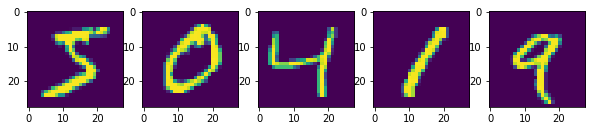

In [9]:
plt.figure(figsize=(10,5))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train_load[i])

In [10]:
print(y_train_load[:5])

[5 0 4 1 9]


### Reshaping Data

Before building our neural network, let us reshape the data. This is because most convolutional neural networks are designed in a way so that they can only accept images of a fixed size. Note that in reshaping the data, the dimension ordering is different when using Tensorflow or Theano as a backend.

* Tensorflow: 28, 28, 1 (the channel comes last)
* Theano: 1, 28, 28 (the channel comes first)

In [11]:
X_train_load[0].shape

(28, 28)

In [12]:
X_train = X_train_load.reshape(X_train_load.shape[0], 28, 28, 1)
X_test = X_test_load.reshape(X_test_load.shape[0],28, 28, 1)

In [13]:
X_train[0].shape

(28, 28, 1)

### Normalizing Data

Normalizing data is especially important in this case because data has a wide range from 0 to 255. This ensures that data differences are maintained over a smaller range which yields higher accuracy after training. For a demonstration of the importance of normalization please see the following link (https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029).

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### One Hot Encoding

The targets can be one hot encoded with the builtin to_categorical function. We simply pass in the target values and the number of classes in the classification problem.

In [15]:
Y_train = np_utils.to_categorical(y_train_load, 10)
Y_test = np_utils.to_categorical(y_test_load, 10)

### Building Network Model

Layers can be stacked upon each other in a sequential model. In this case, we are building a model based off the one described in "Keras Tutorial: The Ultimate Beginner's Guide to Deep Learning in Python". 

In [16]:
model = Sequential()

Convolutional layer parameters described here:
* Number of filters: 32
* Filter size or kernel size: 3 x 3
* Activation Function: ReLU
* Input shape: 28, 28, 1 (This is the shape of the reshaped data)
* Dropout: Drop 0.25 of the input units randomly
* Dense: Another layer with 128 units and another with 10 units

More information regarding these core layers can be described here (https://keras.io/layers/core/)

In [17]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

During compilation of the model, we can choose the loss function, the optimizer, and the metrics.
Many more choices are availiable and can be described in the Keras documentation.
* Loss: https://keras.io/losses/
* Optimizer: https://keras.io/optimizers/
* Metrics: https://keras.io/metrics/


In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training Model

Let us train the model for 10 epochs to see the results. By setting 'verbose' to 1, we are able to see the output after each training. This will take about 15 minutes without GPU.

In [21]:
model.fit(X_train, Y_train, 
          batch_size=32, 
          epochs=10, 
          verbose=1)

W0801 00:16:26.712519 140735736558528 deprecation.py:323] From /Users/xiaosg/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.2174 - accuracy: 0.9330
Epoch 2/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0876 - accuracy: 0.9740
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0694 - accuracy: 0.9796
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0555 - accuracy: 0.9834
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0511 - accuracy: 0.9841
Epoch 6/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0435 - accuracy: 0.9863
Epoch 7/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0354 - accuracy: 0.9890
Epoch 8/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0347 - accuracy: 0.9894
Epoch 9/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0325 - accuracy: 0.9900
Epoch 10/10
60

In [22]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 4s 376us/sample - loss: 0.0272 - accuracy: 0.9912


In [23]:
score[1]

0.9912

### Testing Model

After training, the model may be run on testing data to generate the predictions for unlabelled data.

In [24]:
y_hat = model.predict(X_test)

### Error Images

We get a very high accuracy (over 99%) after training and testing. However, let us show some of the misclassified images. Although this is a very robust model, there are still some limitations for differentiating handwritten digits for machines.

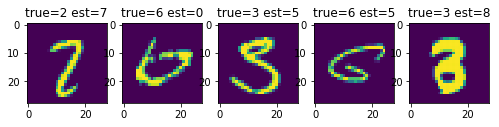

In [25]:
plt.figure(figsize=(10,6))
j=1

for i in range(len(y_hat)):
    
    threshold1 = y_hat[i] < 0.1
    y_hat[i][threshold1] = 0
    threshold2 = y_hat[i] > 0.9
    y_hat[i][threshold2] = 1
    y_hat[i].astype(int)
    
    estimated = np.argwhere(y_hat[i]==1)
    true = int(np.argwhere(Y_test[i]==1))
   
    
    if j<6 and estimated != true:
        
        plt.subplot(1,6,j+1)
        title = 'true={0:d} est={1:d}'.format(true, int(estimated))
        plt.imshow(X_test_load[i])
        plt.title(title)
        j=j+1
